#### Imports

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

import wrangle
import explore

# Exercises

#### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.



In [2]:
df = wrangle.get_zillow_data()

Found CSV


In [3]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
df = wrangle.wrangle_zillow(df)

In [5]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county,orange,ventura
4,4,2.0,3633,296425,2005,6941.39,la,0,0
6,3,4.0,1620,847770,2011,10244.94,la,0,0
7,3,2.0,2077,646760,1926,7924.68,la,0,0
18,3,1.0,1244,169471,1950,2532.88,la,0,0
19,3,2.0,1300,233266,1950,3110.99,la,0,0


#### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.



In [6]:
train, validate, test = wrangle.split_function(df)

In [7]:
print(f'      df: {df.shape}')
print(f'   train: {train.shape}')
print(f'validate: {validate.shape}')
print(f'    test: {test.shape}')

      df: (2010708, 9)
   train: (1206424, 9)
validate: (402142, 9)
    test: (402142, 9)


In [8]:
train.sample(5)

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county,orange,ventura
2122639,3,2.0,1814,528390,1955,6446.47,la,0,0
416946,3,1.5,1307,336680,1950,4113.48,orange,1,0
306679,3,1.0,1185,50065,1947,1160.50,la,0,0
320143,3,2.0,1352,300923,1956,3678.50,orange,1,0
1197816,2,2.0,1340,65189,1951,1135.42,la,0,0


#### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



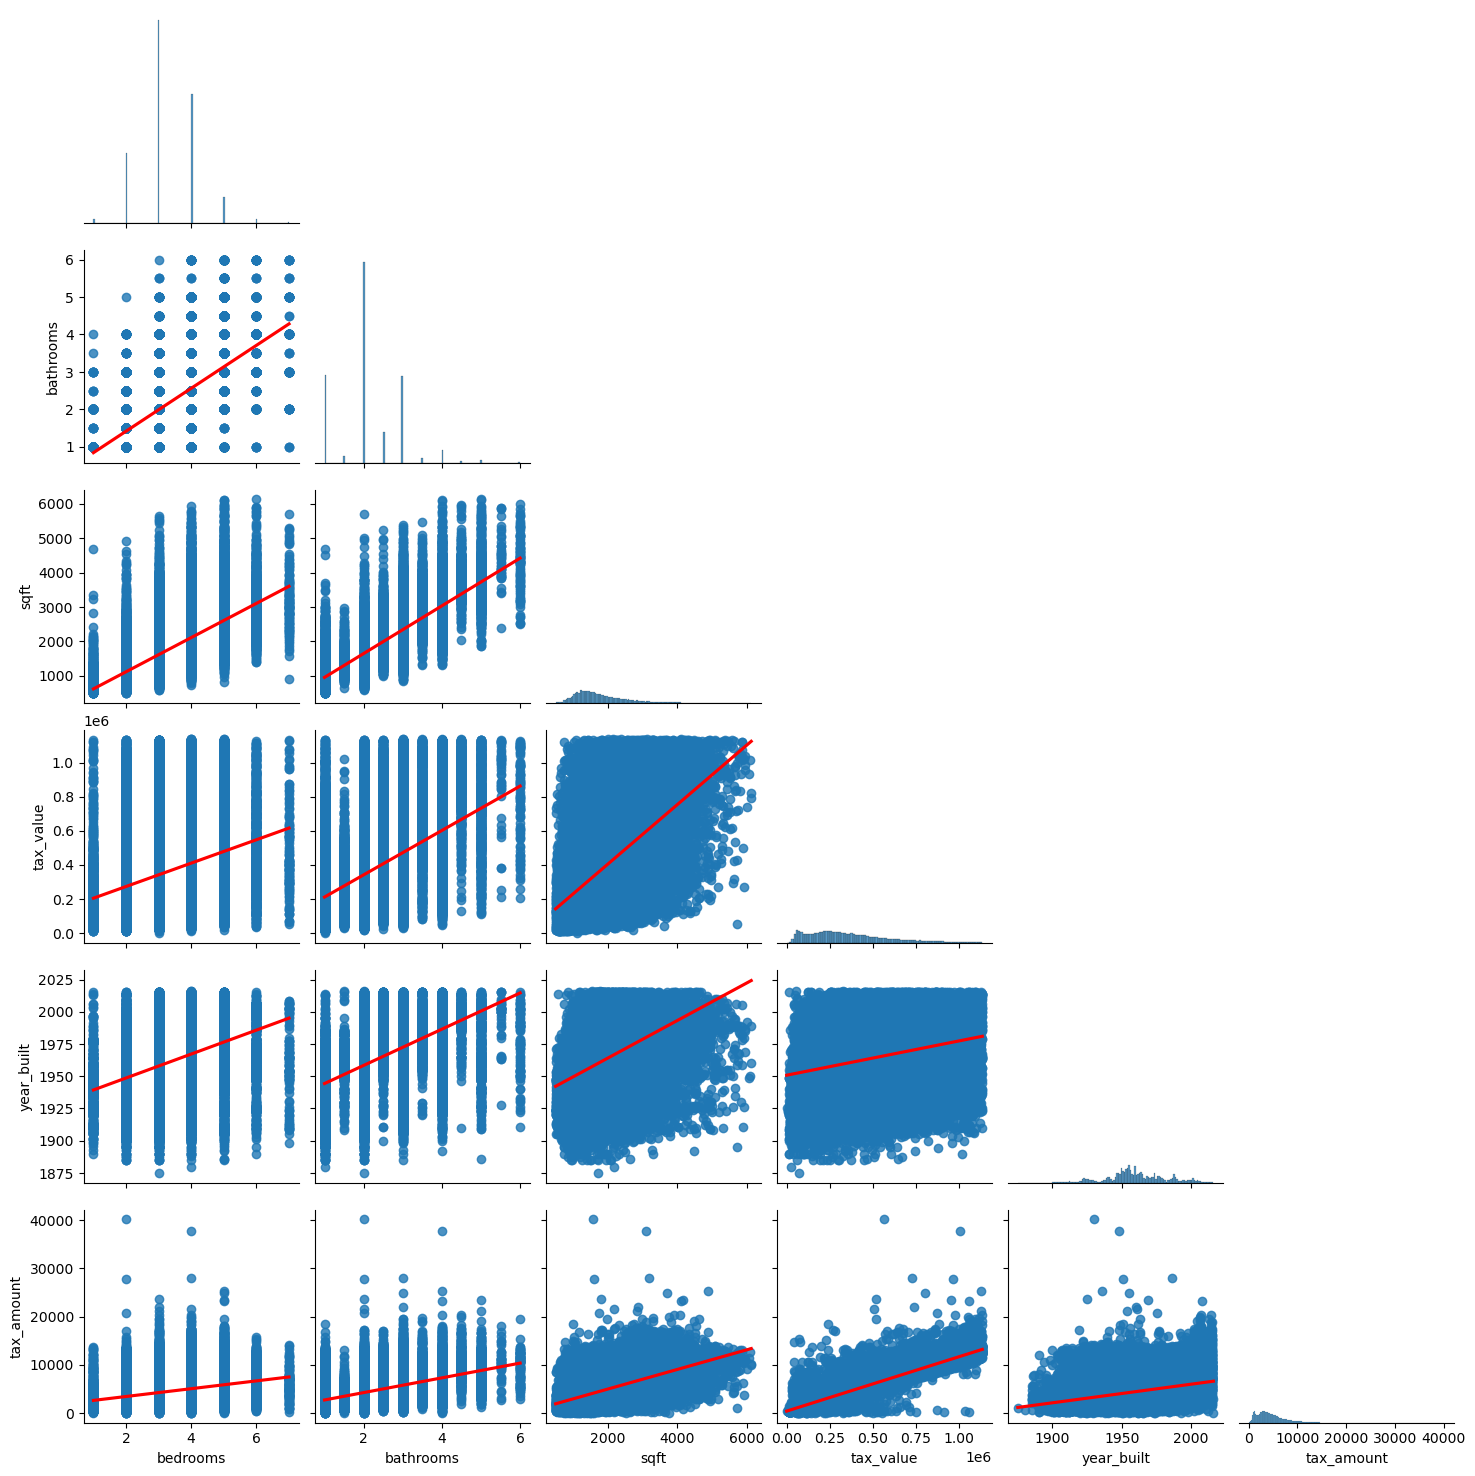

In [55]:
sns.pairplot(train.sample(100_000).drop(columns=['county', 'orange', 'ventura']),
             kind='reg', plot_kws={'line_kws':{'color':'red'}},
              corner=True)
plt.show()

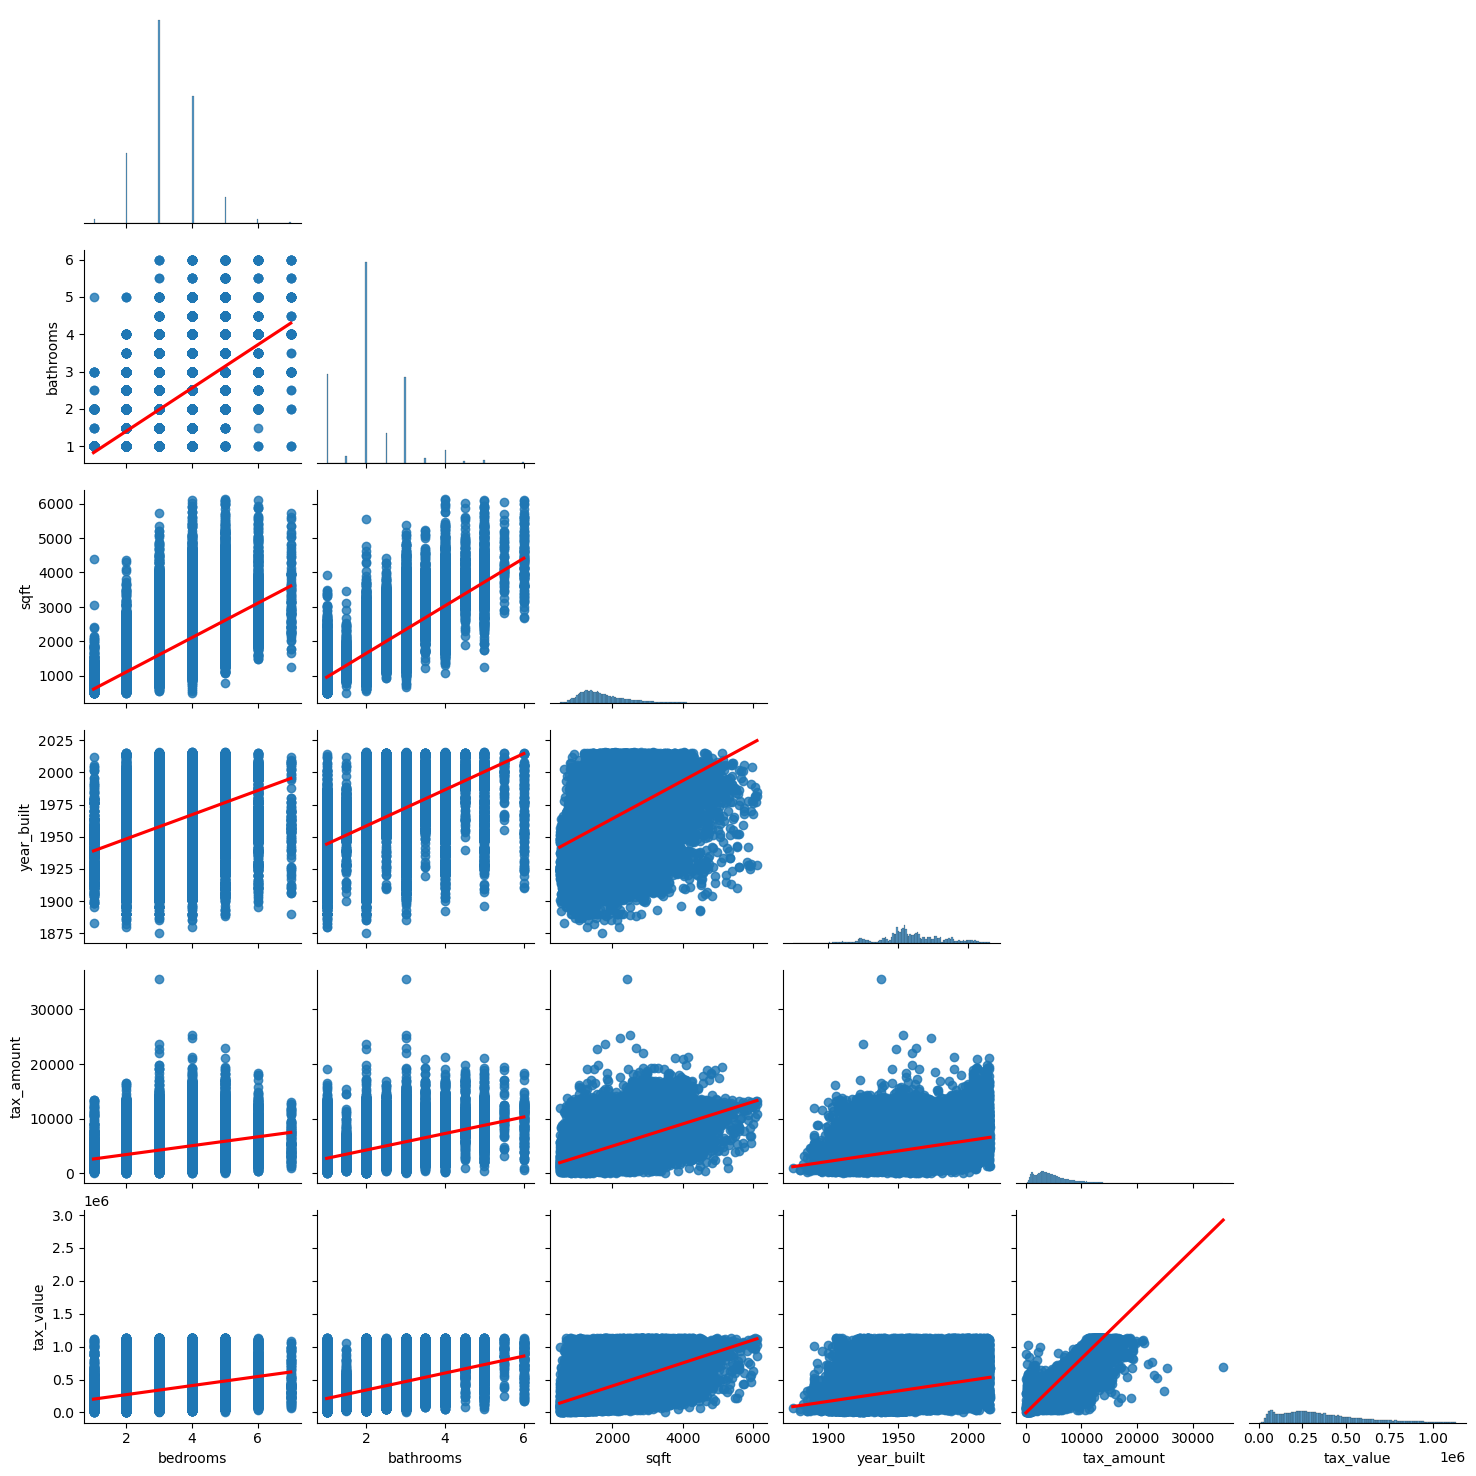

In [57]:
# create a list of column names, with the target variable 'tax_value' at the end
cols = list(train.columns)
cols.remove('tax_value')
cols.append('tax_value')

# create the pair plot with the reordered columns
sns.pairplot(train[cols].sample(100_000).drop(columns=['county', 'orange', 'ventura']), kind='reg', plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.show()

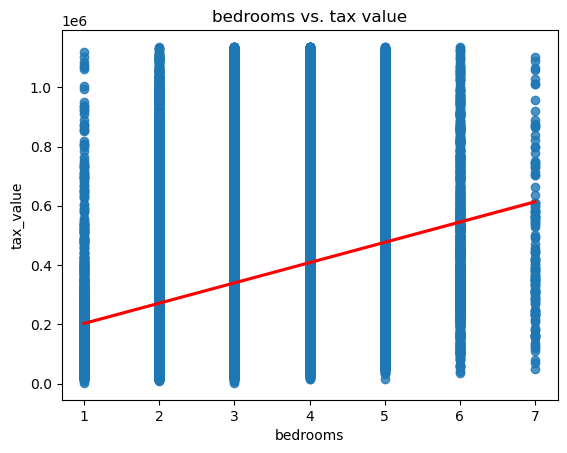

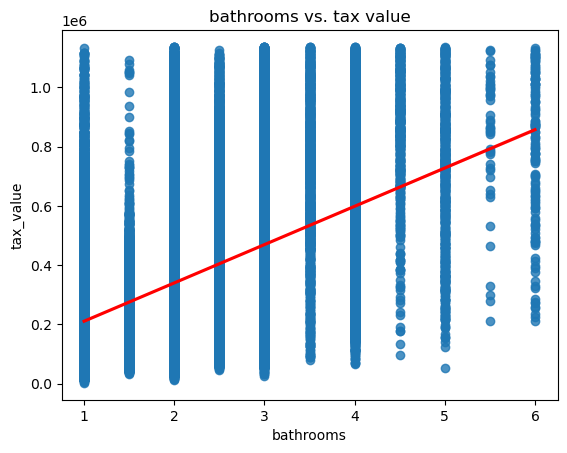

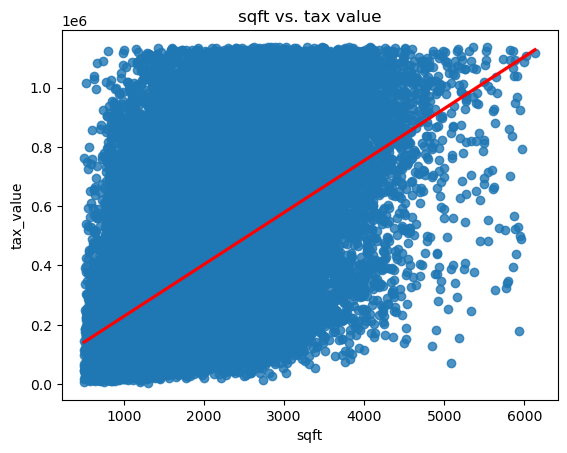

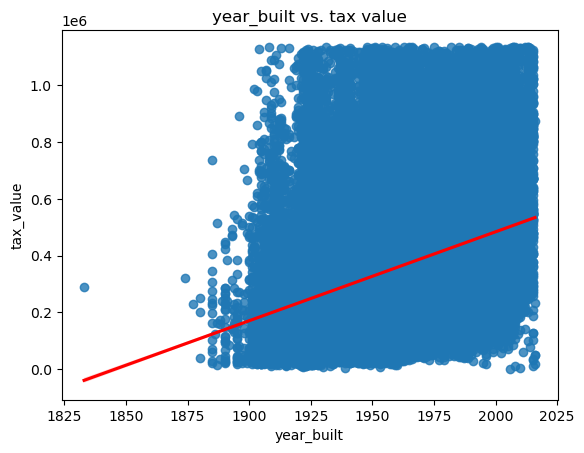

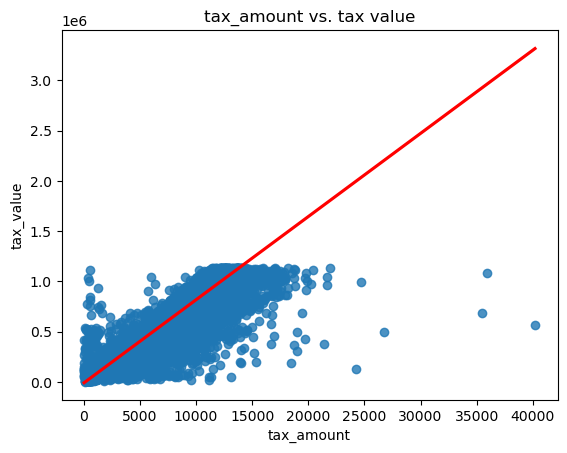

In [11]:
explore.plot_variable_pairs(train)

In [60]:
train.tax_value.max()

1136369

#### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.



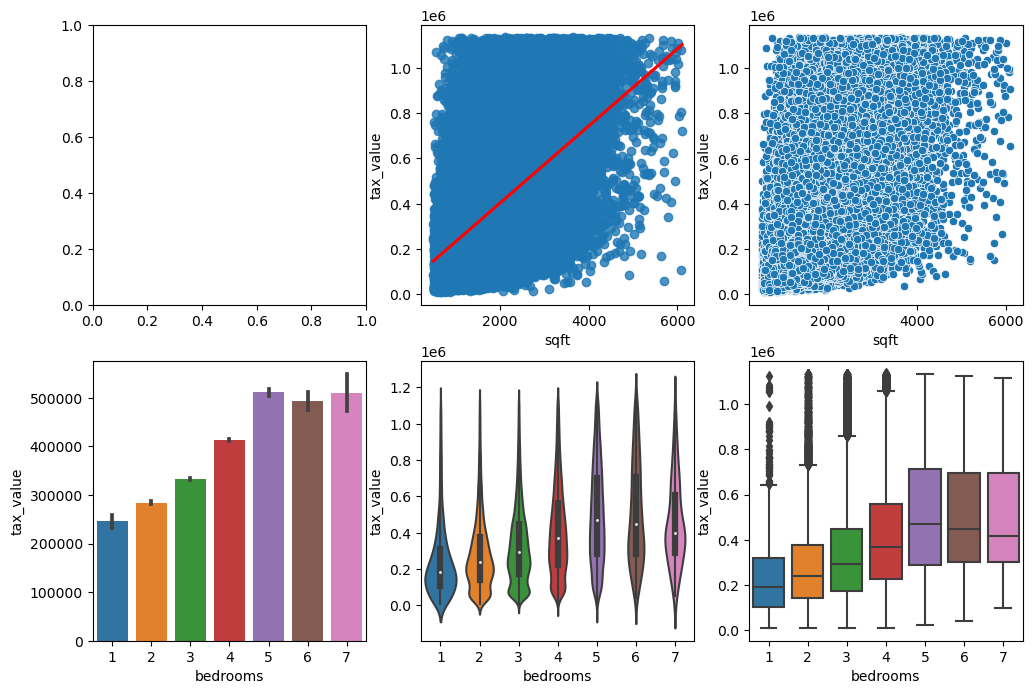

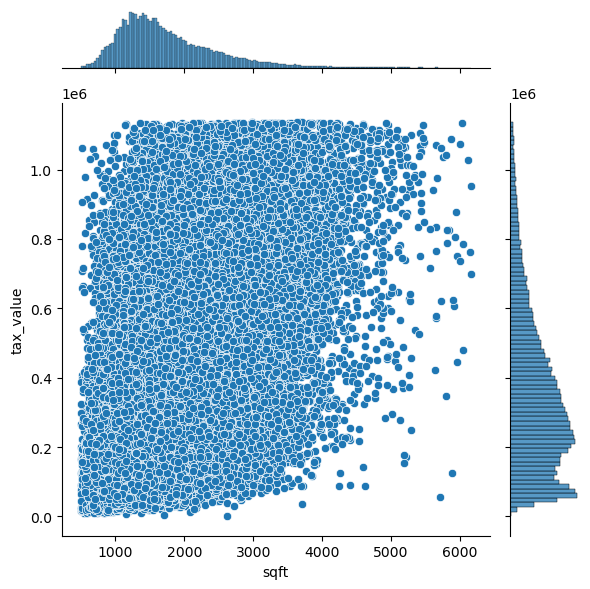

In [12]:
explore.plot_categorical_and_continuous_vars(train, 'sqft', 'bedrooms')

#### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.



In [ ]:
def plot_variable_pairs(train):
    '''
    Insert train dataframe
    This function is taking a sample of 100_000 to speed the process up
    '''
    # isolating columns I want to plot with target variable
    columns_to_plot = ['bedrooms', 'bathrooms', 'sqft', 'year_built', 'tax_amount']
    
    # created a for loop to plot variable with target variable including regression line
    for col in columns_to_plot:
        sns.regplot(x=col, y='tax_value', data=train.sample(100_000), line_kws = {'color':'red'})
        plt.title(f'{col} vs. tax value')
        plt.show()

In [ ]:
def plot_categorical_and_continuous_vars(train, cont, cat):
    '''
    input cont and cat variables as strings
    i.e. 'bedrooms', 'sqft'
    '''
    cont_var= cont
    cat_var = cat
    
    # create a figure with 2 rows and 3 columns of subplots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
    
    # plot data on each subplot
    sns.jointplot(x=cont_var, y='tax_value', data=train.sample(100_000), kind='scatter', ax=axes[0, 0])
    sns.regplot(x=cont_var, y='tax_value', data=train.sample(100_000), line_kws = {'color':'red'}, ax=axes[0, 1])
    sns.scatterplot(x=cont_var, y='tax_value', data=train.sample(100_000), ax=axes[0, 2])
    
    sns.barplot(x=cat_var, y='tax_value', data=train.sample(100_000), ax=axes[1, 0])
    sns.violinplot(x=cat_var, y='tax_value', data=train.sample(100_000), ax=axes[1, 1])
    sns.boxplot(x=cat_var, y='tax_value', data=train.sample(100_000), ax=axes[1, 2])
    
    plt.tight_layout()
    plt.show()

#### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [13]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county,orange,ventura
1752514,3,1.5,1179,159188,1957,2022.20,orange,1,0
1400740,3,2.0,1663,456862,1952,5603.99,la,0,0
1278943,3,2.0,1133,208719,1963,2514.38,orange,1,0
1105547,3,3.0,2562,555988,1969,6375.61,la,0,0
355207,4,2.0,2747,673720,1935,8411.60,la,0,0


In [29]:
train[train.county == 'la'].describe()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,orange,ventura
count,804009.000000,804009.000000,804009.000000,8.040090e+05,804009.000000,804009.000000,804009.0,804009.0
mean,3.154434,2.039000,1656.387677,3.316294e+05,1954.704292,4281.052103,0.0,0.0
std,0.872533,0.844992,680.088285,2.262784e+05,21.167529,2705.640160,0.0,0.0
min,1.000000,1.000000,500.000000,2.200000e+01,1801.000000,76.710000,0.0,0.0
25%,3.000000,1.000000,1183.000000,1.645430e+05,1944.000000,2319.810000,0.0,0.0
50%,3.000000,2.000000,1501.000000,2.809680e+05,1953.000000,3714.960000,0.0,0.0
75%,4.000000,2.000000,1960.000000,4.453670e+05,1964.000000,5622.890000,0.0,0.0
max,7.000000,6.000000,6159.000000,1.136369e+06,2016.000000,57963.320000,0.0,0.0


In [30]:
train[train.county == 'orange'].describe()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,orange,ventura
count,308550.000000,308550.000000,308550.000000,3.085500e+05,308550.000000,308550.000000,308550.0,308550.0
mean,3.452737,2.332333,1915.564097,4.185494e+05,1970.644029,4883.724107,1.0,0.0
std,0.838938,0.696259,698.747286,2.473841e+05,17.180258,2851.403288,0.0,0.0
min,1.000000,1.000000,500.000000,2.080000e+03,1874.000000,20.240000,1.0,0.0
25%,3.000000,2.000000,1388.000000,2.336705e+05,1959.000000,2809.270000,1.0,0.0
50%,3.000000,2.000000,1778.000000,3.821995e+05,1969.000000,4431.780000,1.0,0.0
75%,4.000000,3.000000,2323.000000,5.752970e+05,1980.000000,6519.615000,1.0,0.0
max,7.000000,6.000000,6158.000000,1.136315e+06,2016.000000,100379.340000,1.0,0.0


In [31]:
train[train.county == 'ventura'].describe()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,orange,ventura
count,93865.000000,93865.000000,93865.000000,9.386500e+04,93865.000000,93865.000000,93865.0,93865.0
mean,3.543557,2.326495,1920.256656,3.919400e+05,1973.347435,4501.751397,0.0,1.0
std,0.806824,0.718987,715.339660,2.271422e+05,17.789178,2589.543533,0.0,0.0
min,1.000000,1.000000,500.000000,6.396000e+03,1855.000000,36.680000,0.0,1.0
25%,3.000000,2.000000,1396.000000,2.305760e+05,1962.000000,2681.840000,0.0,1.0
50%,4.000000,2.000000,1781.000000,3.625540e+05,1972.000000,4160.260000,0.0,1.0
75%,4.000000,3.000000,2307.000000,5.228530e+05,1986.000000,5936.660000,0.0,1.0
max,7.000000,6.000000,6142.000000,1.136137e+06,2016.000000,35466.420000,0.0,1.0


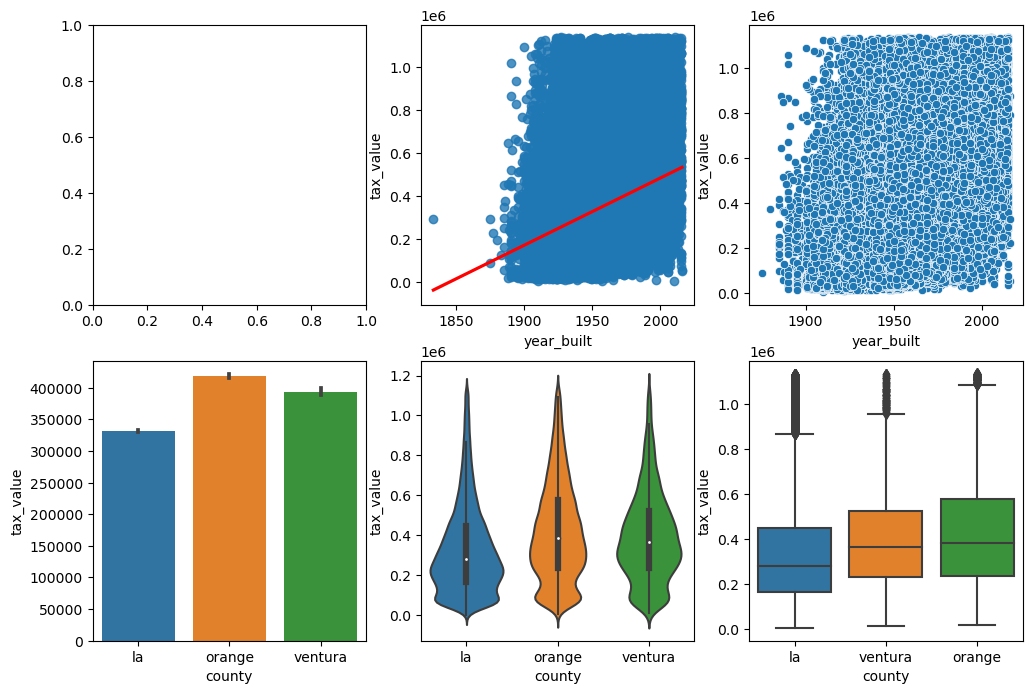

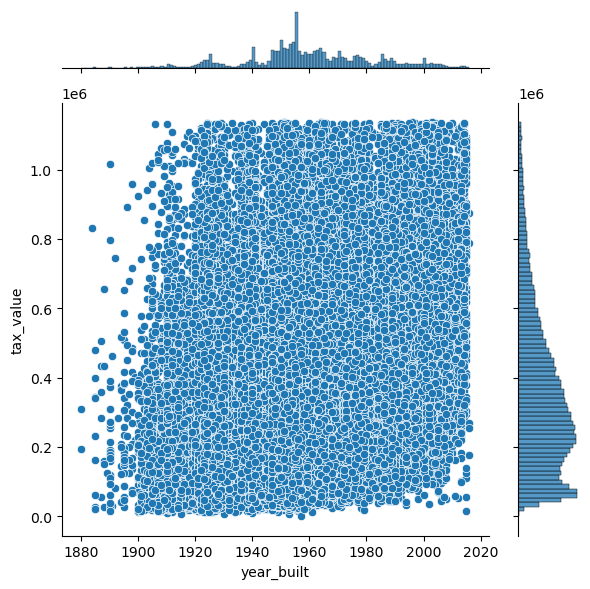

In [14]:
explore.plot_categorical_and_continuous_vars(train, 'year_built', 'county')

#### 7. Come up with some initial hypotheses based on your goal of predicting property value.



**Intial hypothesis:**  
*square footage is the biggest indicator of property value*

In [69]:
feature_corr = train.corr(method='spearman')
feature_corr

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,orange,ventura
bedrooms,1.000000,0.613742,0.640570,0.248484,0.424613,0.250517,0.137637,0.101099
bathrooms,0.613742,1.000000,0.806854,0.415366,0.577458,0.415002,0.171762,0.079028
sqft,0.640570,0.806854,1.000000,0.456773,0.511169,0.454225,0.166215,0.082321
tax_value,0.248484,0.415366,0.456773,1.000000,0.276516,0.974985,0.152851,0.052889
year_built,0.424613,0.577458,0.511169,0.276516,1.000000,0.274319,0.330039,0.196789
tax_amount,0.250517,0.415002,0.454225,0.974985,0.274319,1.000000,0.097567,0.015626
orange,0.137637,0.171762,0.166215,0.152851,0.330039,0.097567,1.000000,-0.170273
ventura,0.101099,0.079028,0.082321,0.052889,0.196789,0.015626,-0.170273,1.000000


#### 8. Visualize all combinations of variables in some way.



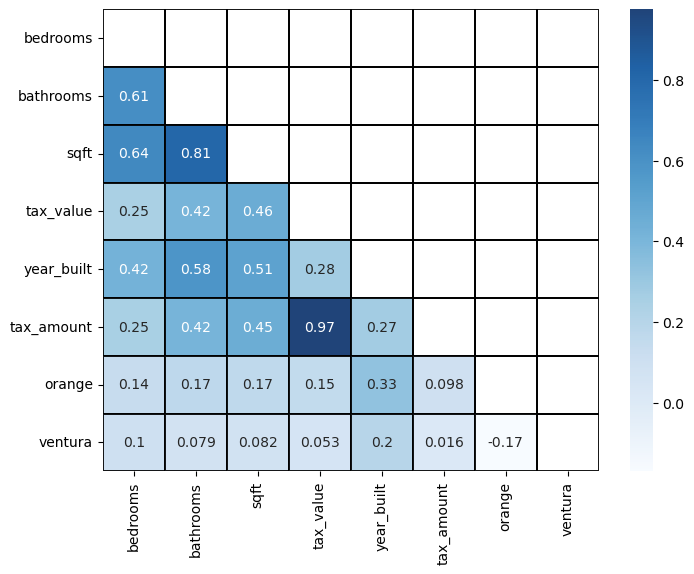

In [84]:
kwargs= {'alpha':.9, 'linewidth':.3, 'linestyle':'-',
        'linecolor':'k', 'rasterized':False, 'edgecolor':'w',
        'capstyle':'projecting',}

plt.figure(figsize=(8,6))
sns.heatmap(feature_corr, cmap='Blues', annot=True, mask = np.triu(feature_corr), **kwargs)
# plt.ylim(0,4)

plt.show()

#### 9. Run the appropriate statistical tests where needed.



In [ ]:
sqft & bathrooms  
continuous & continuous

In [ ]:
sqft & tax_value
continuous & continuous

#### 10. What independent variables are correlated with the dependent variable, home value?



#### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?



#### 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.



#### 13. Explore your dataset with any other visualizations you think will be helpful.

